### Script to input and combine sales data for a store (Selling electronic items). Some indicators explored along the program regarding sales data:

##### 1. Month wise Sales.
##### 2. City wise Sales.
##### 3.  24 hour Product Sales count for advertisement projections.

In [2]:
import glob
import pandas as pd               # For read/write and updation methods in easier format
import matplotlib.pyplot as plt   # Plotting graphs, plots, bar charts etc.
import numpy as np                # For arithematic calculations
import os
from os import listdir

#df = pd.read_csv("./Pandas_Data_Science/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
#df.head()


In [8]:
all_data = pd.read_csv('all_data.csv')     # Reading data from csv file and making a data frame named all_data 
all_data.head(10)                          # Display of that data as named in csv colums 

all_data.describe(include = "all")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [9]:
all_mnths_data = pd.DataFrame()             # Script for concatenating all month separate data to one csv file.

files = [file for file in os.listdir("./Pandas_Data_Science/SalesAnalysis/Sales_Data")]
for file in files:
    df = pd.read_csv("./Pandas_Data_Science/SalesAnalysis/Sales_Data/"+file)
    all_mnths_data = pd.concat([all_mnths_data,df])

all_mnths_data.to_csv('all_data.csv', index=False)


In [5]:
#Removing Nan values

In [14]:
nan_df = all_data[all_data.isna().any(axis=1)]   # Removing NaN values from the data by read and drop any index value
nan_df.head(100)

all_data = all_data.dropna(how='all')
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [15]:
# Clearing/deleting residual data which is faulty as per Or error code generated 

temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [16]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')   # Converting data type from all to numeric int in columns to be calculated 

all_mnths_data.to_csv('all_data.csv', index=False)      # Saving the data to excel file
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


In [17]:
# More cleaning of Data - Convert cloumns to correct type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  # Convert to type integer
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])              # Converting to type Float 

In [21]:
# Add a new Sales Column for calculatinf sales price

all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

all_data.tail(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
186830,259339,USB-C Charging Cable,2.0,11.95,09/12/19 23:43,"509 Park St, Austin, TX 73301",9,23.90
186831,259340,AA Batteries (4-pack),2.0,3.84,09/18/19 20:18,"544 Hickory St, Los Angeles, CA 90001",9,7.68
186832,259341,27in 4K Gaming Monitor,1.0,389.99,09/24/19 22:16,"501 Adams St, Seattle, WA 98101",9,389.99
186833,259342,AA Batteries (4-pack),1.0,3.84,09/07/19 20:09,"579 South St, Boston, MA 02215",9,3.84
186834,259343,USB-C Charging Cable,1.0,11.95,09/14/19 19:30,"675 Maple St, Austin, TX 73301",9,11.95
186835,259344,AAA Batteries (4-pack),2.0,2.99,09/10/19 23:33,"721 Madison St, San Francisco, CA 94016",9,5.98
186836,259345,ThinkPad Laptop,1.0,999.99,09/21/19 23:12,"406 Dogwood St, San Francisco, CA 94016",9,999.99
186837,259346,Bose SoundSport Headphones,1.0,99.99,09/29/19 17:24,"484 Cedar St, New York City, NY 10001",9,99.99
186838,259347,AA Batteries (4-pack),1.0,3.84,09/26/19 10:12,"979 Madison St, Los Angeles, CA 90001",9,3.84
186839,259348,Lightning Charging Cable,1.0,14.95,09/30/19 21:03,"260 Spruce St, Boston, MA 02215",9,14.95


In [22]:
# Grouping by desired parameters using groupby

results = all_data.groupby('Month').sum()

results.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1.811768e+06,1.822257e+06
2,13449.0,2.188885e+06,2.202022e+06
3,17005.0,2.791208e+06,2.807100e+06
4,20558.0,3.367671e+06,3.390670e+06
5,18667.0,3.135125e+06,3.152607e+06
6,15253.0,2.562026e+06,2.577802e+06
7,16072.0,2.632540e+06,2.647776e+06
8,13448.0,2.230345e+06,2.244468e+06
9,13109.0,2.084992e+06,2.097560e+06


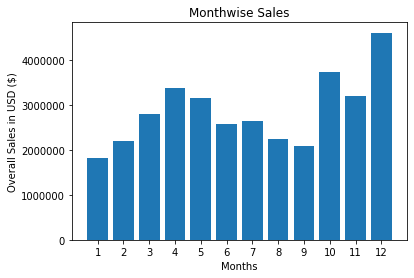

In [23]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.title('Monthwise Sales')
plt.style.use('fivethirtyeight')
plt.bar(months, results['Sales'])            # plt.style.available to check new styles
plt.xticks(months)
plt.ylabel('Overall Sales in USD ($)')
plt.xlabel('Months')
plt.show()

### What city had the highest no. of sales

In [27]:
# Lets use apply() method to extract city names from address column
#all_data = all_data.drop(columns = 'Column')
# x is cell content in Purchase Address and paste it in State column

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2])
all_data['State_Def'] = all_data['State'].apply(lambda x: x.split(' ')[1])
#all_data = all_data.drop(columns = 'State')
#all_data = all_data.drop(columns = 'State 1')
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,State_Def
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,CA
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,CA 94016,CA
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,WA 98101,WA
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,GA 30301,GA
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,CA 94016,CA
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston,MA 02215,MA


In [28]:
# Grouping by desired parameters

results = all_data.groupby('City').sum()

results.head(9)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602.0,2.779908e+06,104794,2.795499e+06
Austin,11153.0,1.809874e+06,69829,1.819582e+06
Boston,22528.0,3.637410e+06,141112,3.661642e+06
Dallas,16730.0,2.752628e+06,104620,2.767975e+06
Los Angeles,33289.0,5.421435e+06,208325,5.452571e+06
New York City,27932.0,4.635371e+06,175741,4.664317e+06
Portland,14053.0,2.307747e+06,87765,2.320491e+06
San Francisco,50239.0,8.211462e+06,315520,8.262204e+06
Seattle,16553.0,2.733296e+06,104941,2.747755e+06


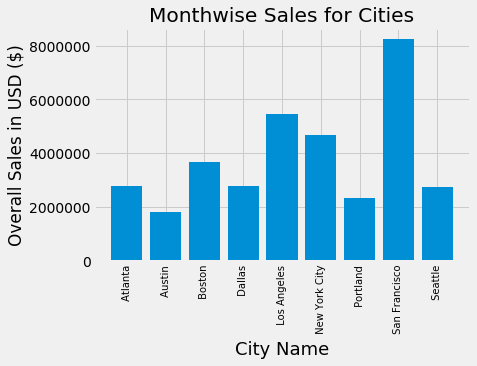

In [31]:
import matplotlib.pyplot as plt

#cities = all_data['City'].unique()

cities = [city for city,df in all_data.groupby('City')]
plt.title('Monthwise Sales for Cities')
plt.style.use('fivethirtyeight')
plt.bar(cities, results['Sales'])            # plt.style.available to check new styles
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Overall Sales in USD ($)')
plt.xlabel('City Name', fontsize=18)
plt.show()

In [32]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Count'] = 1
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,State_Def,Hour,Count
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,TX,8,1
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,MA,22,1
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,CA,14,1
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,CA,14,1
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,CA,9,1
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,CA 94016,CA,13,1
7,176563,Bose SoundSport Headphones,1.0,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,WA 98101,WA,7,1
8,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,GA 30301,GA,10,1
9,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,CA 94016,CA,10,1
10,176566,Wired Headphones,1.0,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston,MA 02215,MA,14,1


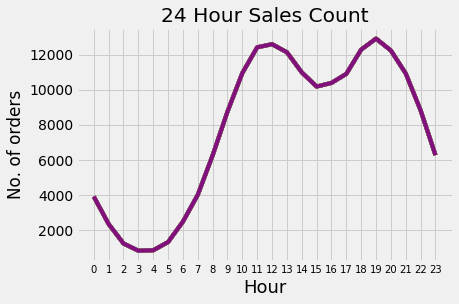

In [37]:
import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())           

plt.title('24 Hour Sales Count')
plt.style.use('fivethirtyeight')        # plt.style.available to check new styles

plt.xticks(hours, size=10)
plt.ylabel('No. of orders')
plt.xlabel('Hour', fontsize=18)
plt.show()

#Suggestion Display ad at 11Am to 7pm also the same can be distinguished for city wise data.

#### What Products are sold together ?

In [38]:
results_2 = all_data.groupby('Product').sum()

results_2.head(20)

,Quantity Ordered,Price Each,Month,Sales,Hour,Count
Product,,,,,,
20in Monitor,4129.0,451068.99,29336,454148.71,58764,4101
27in 4K Gaming Monitor,6244.0,2429637.70,44440,2435097.56,90916,6230
27in FHD Monitor,7550.0,1125974.93,52558,1132424.50,107540,7507
34in Ultrawide Monitor,6199.0,2348718.19,43304,2355558.01,89076,6181
AA Batteries (4-pack),27635.0,79015.68,145558,106118.40,298342,20577
AAA Batteries (4-pack),31017.0,61716.59,146370,92740.83,297332,20641
Apple Airpods Headphones,15661.0,2332350.00,109477,2349150.00,223304,15549
Bose SoundSport Headphones,13457.0,1332366.75,94113,1345565.43,192445,13325
Flatscreen TV,4819.0,1440000.00,34224,1445700.00,68815,4800


In [39]:
# Segregate by Order ID and arranging with same orderID data

df = all_data[all_data['Order ID'].duplicated(keep = False)]  # Segregate by Order ID, 

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#Dropping out duplicate occurences

df = df[['Grouped','Order ID']].drop_duplicates()
df.head(20)

C:\Users\samee\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Grouped,Order ID
3,"Google Phone,Wired Headphones",176560
18,"Google Phone,USB-C Charging Cable",176574
30,"Bose SoundSport Headphones,Bose SoundSport Hea...",176585
32,"AAA Batteries (4-pack),Google Phone",176586
119,"Lightning Charging Cable,USB-C Charging Cable",176672
129,"Apple Airpods Headphones,ThinkPad Laptop",176681
138,"Bose SoundSport Headphones,AAA Batteries (4-pack)",176689
189,"34in Ultrawide Monitor,Google Phone",176739
225,"Lightning Charging Cable,USB-C Charging Cable",176774
233,"iPhone,Lightning Charging Cable",176781


In [41]:
# Counting finally those pairs to finalize the group sing some new libraries and tools to tackle this issue
# Use stack overflow fo unique pairs of combinations

from itertools import combinations
from collections import Counter

count_2 = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count_2.update(Counter(combinations(row_list,2)))
    
count_2.most_common(20)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

In [42]:
from itertools import combinations
from collections import Counter

count_3 = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count_3.update(Counter(combinations(row_list,3)))
    
count_3.most_common(10)


[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

#### What products sold the most ?

In [ ]:
results_3 = all_data.groupby('Product').sum()

results_3.head(20)

In [ ]:
product_group = all_data.groupby('Product')
quantity = product_group.sum()['Quantity Ordered']
product = [product for product, df in product_group]

plt.title('Total sales of all products')
plt.barh(product, results_3['Quantity Ordered'])            # plt.style.available to check new styles
plt.xticks(product, rotation='vertical', size=10)
plt.xlabel('Product', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

prices = all_data.groupby('Product').mean()['Price Each']
 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity)
ax2.bar(product, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)
plt.tight_layout()
plt.show()
